In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
games = pd.read_parquet(r'C:\Users\Moises\Desktop\Projecto invidual 1\archivos limpios\games.parquet')
reviews = pd.read_parquet(r'C:\Users\Moises\Desktop\Projecto invidual 1\archivos limpios\reviews.parquet')
items = pd.read_parquet(r'C:\Users\Moises\Desktop\Projecto invidual 1\archivos limpios\items.parquet')
final = pd.read_parquet(r'C:\Users\Moises\Desktop\Projecto invidual 1\archivos limpios\data_final.parquet')

In [3]:
# se sacan las horas
top_5 = final[['title','playtime_forever']].groupby('title').sum()
# Agarramos el top 5 
juego_mas_jugado = top_5['playtime_forever'].sort_values(ascending=False).head(5)

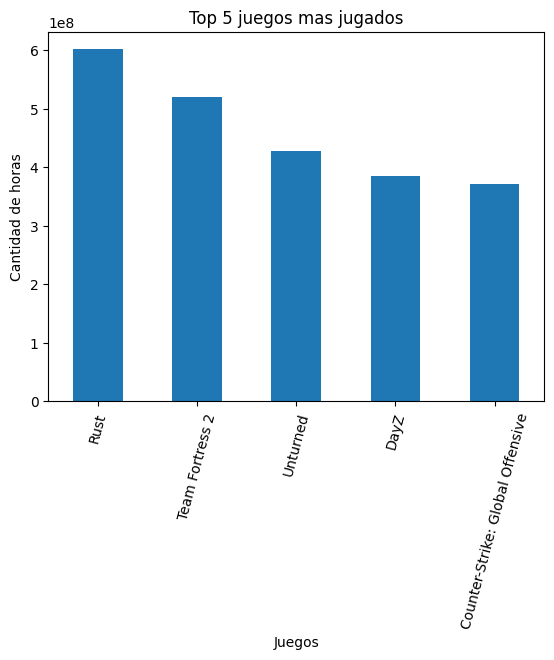

In [4]:
# Creamos el grafico de barras
juego_mas_jugado.plot(kind='bar')
plt.title('Top 5 juegos mas jugados')
plt.xlabel('Juegos')
plt.ylabel('Cantidad de horas')
plt.xticks(rotation=75)
plt.show()

In [5]:
# se sacan las horas
top_5_generos = final[['genres','playtime_forever']].groupby('genres').sum()
# Agarramos el top 5 
genero_mas_jugado = top_5_generos['playtime_forever'].sort_values(ascending=False).head(5)

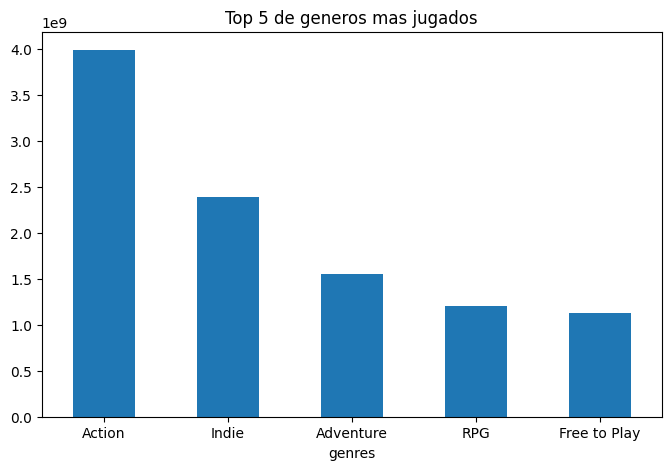

In [6]:
# Grafico de barras
plt.figure(figsize=(8, 5)) 
genero_mas_jugado.plot(kind='bar')
plt.title('Top 5 de generos mas jugados')
plt.xticks(rotation=0)
plt.show()

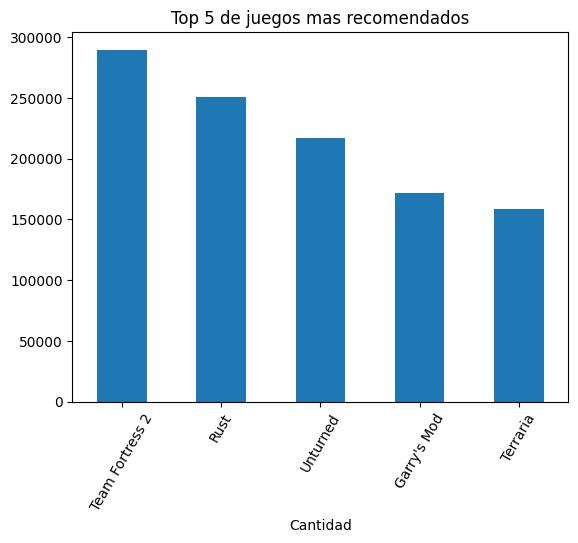

In [7]:
recomendado = final[final['recommend']==True]
juegos_recomendados = recomendado.groupby(['title'])['recommend'].count().sort_values(ascending= False).head(5)
juegos_recomendados
juegos_recomendados.plot(kind='bar')
plt.title('Top 5 de juegos mas recomendados')
plt.xlabel('Cantidad')
plt.xticks(rotation = 60)
plt.show()

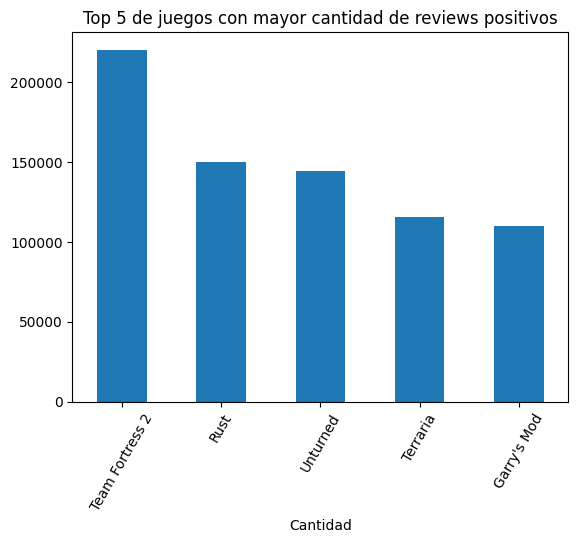

In [8]:
# grafico de barras
positivas = final[final['sentiment_analysis']==2]
juegosAnalysis = positivas[['title', 'sentiment_analysis']].groupby('title')['sentiment_analysis'].sum().sort_values(ascending=False).head(5)
juegosAnalysis.plot(kind='bar')
juegosAnalysis
plt.title('Top 5 de juegos con mayor cantidad de reviews positivos')
plt.xlabel('Cantidad')
plt.xticks(rotation = 60)
plt.show()

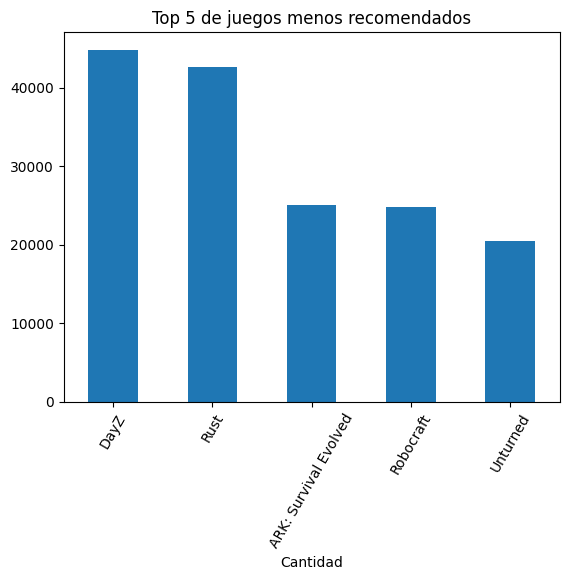

In [9]:
no_recomendado = final[final['recommend']==False]
juegos_no_recomendados = no_recomendado.groupby(['title'])['recommend'].count().sort_values(ascending= False).head(5)
juegos_no_recomendados
juegos_no_recomendados.plot(kind='bar')
plt.title('Top 5 de juegos menos recomendados')
plt.xlabel('Cantidad')
plt.xticks(rotation = 60)
plt.show()

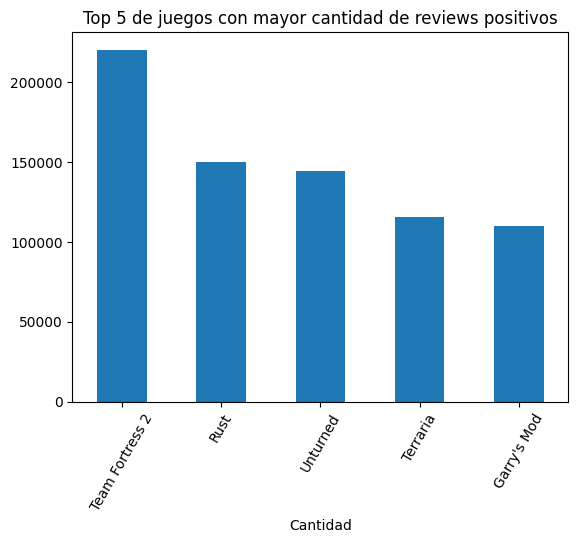

In [10]:
# grafico de barras
positivas = final[final['sentiment_analysis']==2]
juegosAnalysis = positivas[['title', 'sentiment_analysis']].groupby('title')['sentiment_analysis'].sum().sort_values(ascending=False).head(5)
juegosAnalysis.plot(kind='bar')
juegosAnalysis
plt.title('Top 5 de juegos con mayor cantidad de reviews positivos')
plt.xlabel('Cantidad')
plt.xticks(rotation = 60)
plt.show()

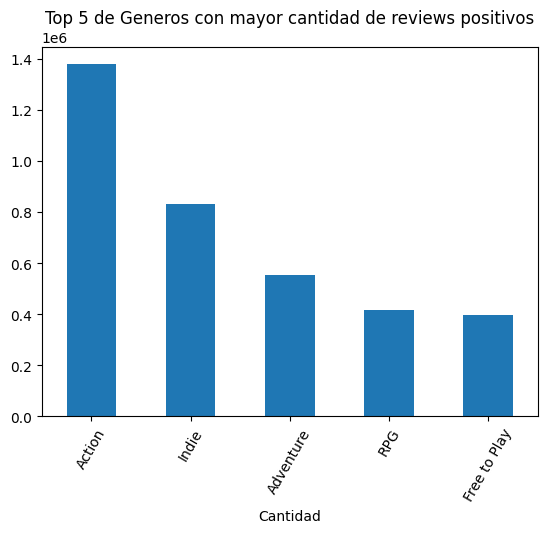

In [11]:
# grafico de barras
juegosAnalysis = positivas[['genres', 'sentiment_analysis']].groupby('genres')['sentiment_analysis'].sum().sort_values(ascending=False).head(5)
juegosAnalysis.plot(kind='bar')
juegosAnalysis
plt.title('Top 5 de Generos con mayor cantidad de reviews positivos')
plt.xlabel('Cantidad')
plt.xticks(rotation = 60)
plt.show()

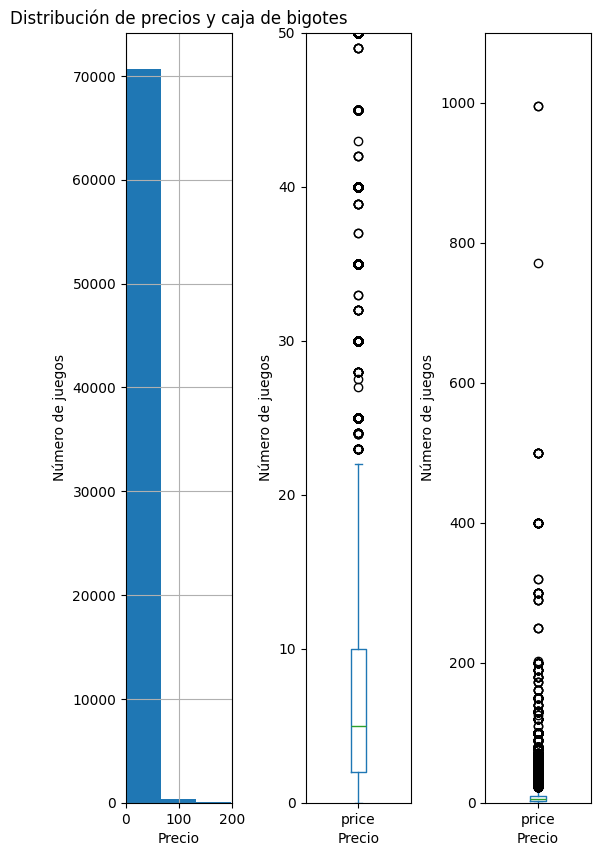

In [12]:
# Grafica de distribucion de precios
plt.subplot(1,3,1)
games['price'].hist(bins = 15, figsize=(6,10))
plt.title('Distribución de precios y caja de bigotes')
plt.xlabel('Precio')
plt.ylabel('Número de juegos')
plt.xlim(0, 200)

# Grafica de caja de bigotes para ver outliers
plt.subplot(1,3,2)
games['price'].plot.box()
plt.xlabel('Precio')
plt.ylabel('Número de juegos')
plt.ylim(0,50)

plt.subplot(1,3,3)
games['price'].plot.box()
plt.xlabel('Precio')
plt.ylabel('Número de juegos')
plt.ylim(0, 1100 )

plt.subplots_adjust(wspace=0.7)
plt.show()

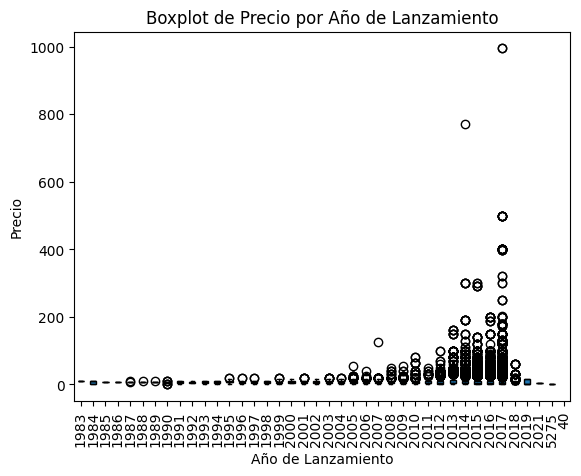

In [13]:
games.sort_values(by="release_date", inplace=True)

plt.boxplot(
    [games[games["release_date"] == año]["price"] for año in games["release_date"].unique()],
    labels=games["release_date"].unique(),
    vert=True,  # Vertical (True) u horizontal (False)
    patch_artist=True,  # Rellenar las cajas con color
    medianprops={"color": "black"}  # Color de la línea de la mediana
)

plt.xticks(rotation=90)

# Añadir etiquetas y título
plt.xlabel("Año de Lanzamiento")
plt.ylabel("Precio")
plt.title("Boxplot de Precio por Año de Lanzamiento")

# Mostrar el gráfico
plt.show()

In [14]:
# Conviertimos los valores booleanos de recommend a valores numéricos
reviews["recommend"] = reviews["recommend"].astype(int)

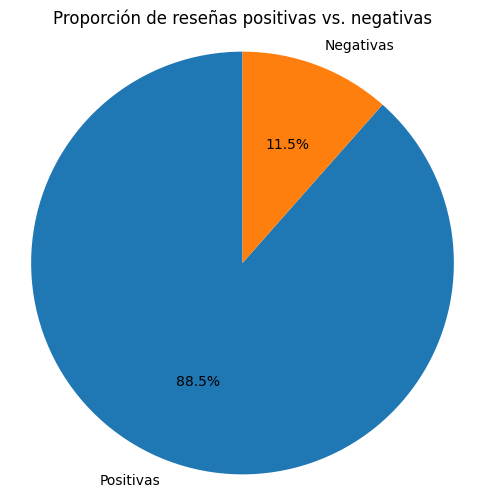

In [15]:
plt.figure(figsize=(6, 6))

# Contar el número de reseñas positivas y negativas
num_positivas = len(reviews[reviews["recommend"] == 1])
num_negativas = len(reviews[reviews["recommend"] == 0])

# Graficar los datos
plt.pie([num_positivas, num_negativas], labels=["Positivas", "Negativas"], autopct="%1.1f%%", startangle=90)
plt.axis("equal")  # Ajustar el aspecto del gráfico para que sea un círculo.
plt.title("Proporción de reseñas positivas vs. negativas")  # Título del gráfico

# Mostrar el gráfico
plt.show()

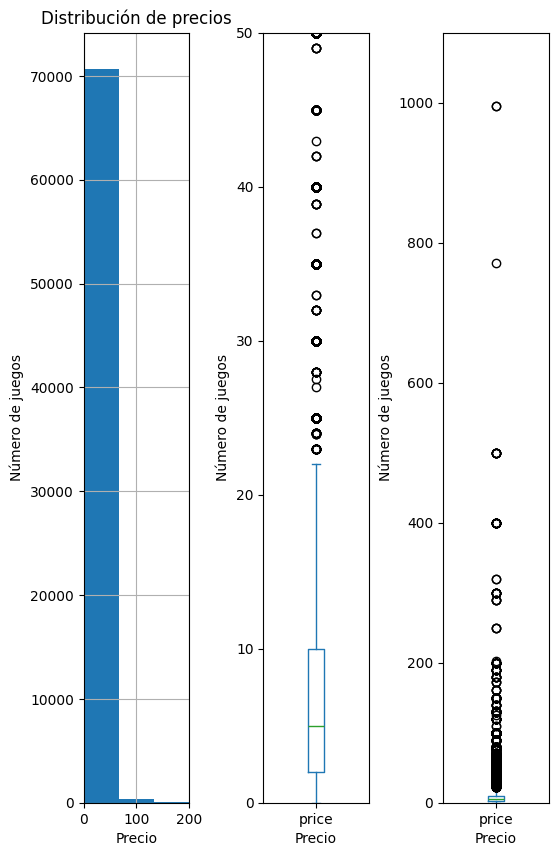

In [16]:
plt.subplot(1,3,1)
games['price'].hist(bins = 15, figsize=(6,10))
plt.title('Distribución de precios')
plt.xlabel('Precio')
plt.ylabel('Número de juegos')
plt.xlim(0, 200)

'////////////////////////////////////////////////////////////////////////////////////////////////////////////'

plt.subplot(1,3,2)
games['price'].plot.box()
plt.xlabel('Precio')
plt.ylabel('Número de juegos')
plt.ylim(0,50)

'/////////////////////////////////////////////////////////////////////////////////////////////////////////////'

plt.subplot(1,3,3)
games['price'].plot.box()
plt.xlabel('Precio')
plt.ylabel('Número de juegos')
plt.ylim(0, 1100 )

'////////////////////////////////////////////////////////////////////////////////////////////////////////////'

plt.subplots_adjust(wspace=0.7)
plt.show()
